In [1]:
results_dir = '../../../results/bpp-egc'

item1d_dataset_name = f'TripletItem1DDataSets-249-380-490-250'
item1d_models = ['Exp1EvolvedBinPacker',
                 'BestFitItem1DPacker', 
                 'FirstFitItem1DPacker']
item1d_models_names = ['Exp1 (seed=19)',
                       'Best Fit', 
                       'First Fit']

dynamicitem1d_dataset_name = 'TripletDynamicItem1DDataSets-501-380-490-250-6-1400'
dynamicitem1d_models = ['FirstFitDynamicItem1DBinPacker',
                        'GCBinDynamicPacker',
                        'Exp2EvolvedDynamicItem1DBinPacker']

item2d_dataset_name = 'TripletItem2DDataSets-501-380-490-250'
item2d_models = ['BestFitItem2DPacker',
                 'Exp3EvolvedBinPacker']

In [ ]:
from open_bins import table_egc

data = table_egc(results_dir, f'TripletItem1DDataSets-249-380-490-250', item1d_models, item1d_models_names)   
data = table_egc(results_dir, f'TripletItem1DDataSets-501-380-490-250', item1d_models, item1d_models_names)  
data = table_egc(results_dir, f'TripletItem1DDataSets-999-380-490-250', item1d_models, item1d_models_names)

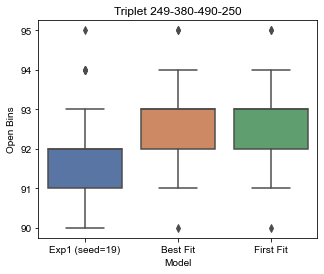

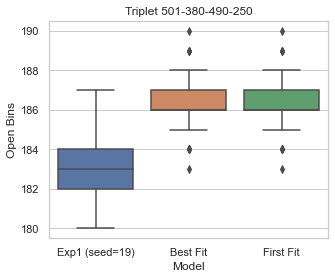

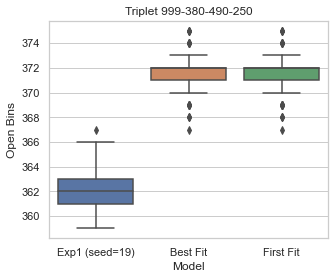

In [2]:
from open_bins import figure_models

figure_models(results_dir, f'TripletItem1DDataSets-249-380-490-250', "Triplet 249-380-490-250", item1d_models, item1d_models_names)   
figure_models(results_dir, f'TripletItem1DDataSets-501-380-490-250', "Triplet 501-380-490-250", item1d_models, item1d_models_names)  
figure_models(results_dir, f'TripletItem1DDataSets-999-380-490-250', "Triplet 999-380-490-250", item1d_models, item1d_models_names)

In [ ]:
from open_bins import table_egc

data = table_egc(results_dir, f'UniformItem1DDataSets-250-20-100', item1d_models, item1d_models_names)   
data = table_egc(results_dir, f'UniformItem1DDataSets-500-20-100', item1d_models, item1d_models_names)  
data = table_egc(results_dir, f'UniformItem1DDataSets-1000-20-100', item1d_models, item1d_models_names)

In [ ]:
from open_bins import figure_models, model_data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

def figure_models(results_dir, dataset, dataset_name, models, models_names, observer_file='BinObserver', figure_name='OpenBins'):
    df = model_data(results_dir, dataset, models, models_names, observer_file)
    fig, axes = plt.subplots()
    fig.set_size_inches(5, 4)
    axes.set_title(f"{dataset_name}")
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    sns.set_theme(style="whitegrid")
    box_plot = sns.boxplot(y="Open Bins", x="Model", data=df)
    box_plot.set(ylabel='Open Bins', xlabel="")
    plt.savefig(f'{results_dir}/{dataset}/{figure_name}.eps', format='eps')
    
# figure_models(results_dir, f'UniformItem1DDataSets-120-20-100', "Uniform 120-20-100", item1d_models, item1d_models_names)
# figure_models(results_dir, f'UniformItem1DDataSets-250-20-100', "Uniform 250-20-100", item1d_models, item1d_models_names)
figure_models(results_dir, f'UniformItem1DDataSets-500-20-100', "Uniform 500-20-100", item1d_models, item1d_models_names) 
# figure_models(results_dir, f'UniformItem1DDataSets-1000-20-100', "Uniform 1000-20-100", item1d_models, item1d_models_names)    


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def exp1_tenderToDouble_t1(itemSize, freeCapacity): 
    return(4 * (itemSize * itemSize) - 2 * (itemSize * freeCapacity) + freeCapacity)

def exp1_tenderToDouble_t2(itemSize, freeCapacity): 
    return(-(itemSize * itemSize) + (itemSize * freeCapacity))

def exp1_tenderToDouble(itemSize, freeCapacity): 
    return(abs(min(exp1_tenderToDouble_t1(itemSize, freeCapacity), 
                   exp1_tenderToDouble_t2(itemSize, freeCapacity))))

def normalise(x):
    return (x / 1000000)

step = 50
exp1_tenderToDouble_t1_data = np.zeros((int(1000/step), int(500/step)))
exp1_tenderToDouble_t2_data = np.zeros((int(1000/step), int(500/step)))
exp1_tenderToDouble_data = np.zeros((int(1000/step), int(500/step)))
for freeCapacity in range(step, 1000+step, step):
    for itemSize in range(step, 500+step, step):
            exp1_tenderToDouble_t1_data[int(freeCapacity/step)-1, int(itemSize/step)-1] = exp1_tenderToDouble_t1(itemSize, freeCapacity)
            exp1_tenderToDouble_t2_data[int(freeCapacity/step)-1, int(itemSize/step)-1]  = exp1_tenderToDouble_t2(itemSize, freeCapacity)
            exp1_tenderToDouble_data[int(freeCapacity/step)-1, int(itemSize/step)-1]  = exp1_tenderToDouble(itemSize, freeCapacity)

print(f"max_value={np.amax(exp1_tenderToDouble_t1_data)}, {np.amax(exp1_tenderToDouble_t2_data)}, {np.amax(exp1_tenderToDouble_data)}")
print(f"min_value={np.amin(exp1_tenderToDouble_t1_data)}, {np.amin(exp1_tenderToDouble_t2_data)}, {np.amin(exp1_tenderToDouble_data)}")

exp1_tenderToDouble_t1_data = normalise(exp1_tenderToDouble_t1_data)
exp1_tenderToDouble_t2_data = normalise(exp1_tenderToDouble_t2_data)
exp1_tenderToDouble_data = normalise(exp1_tenderToDouble_data)

# https://seaborn.pydata.org/tutorial/color_palettes.html
cmap = sns.color_palette("icefire", as_cmap=True)
xticklabels = list(t for t in range(step, 500+step, step))
yticklabels = list(t for t in range(step, 1000+step, step))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
sns.heatmap(ax=axs[0,0], data=exp1_tenderToDouble_t1_data, vmin=-0.25, vmax=1, cmap=cmap, xticklabels=xticklabels, yticklabels=yticklabels)
sns.heatmap(ax=axs[0,1], data=exp1_tenderToDouble_t2_data, vmin=-0.25, vmax=1, cmap=cmap, xticklabels=xticklabels, yticklabels=yticklabels)
sns.heatmap(ax=axs[1,0], data=exp1_tenderToDouble_data, vmin=-0.25, vmax=1, cmap=cmap, xticklabels=xticklabels, yticklabels=yticklabels)
sns.heatmap(ax=axs[1,1], data=exp1_tenderToDouble_data, vmin=-0, vmax=0.25, cmap=cmap, xticklabels=xticklabels, yticklabels=yticklabels)

axs[0,0].invert_yaxis()
axs[0,0].set_xlabel('Item Size', fontsize=12)
axs[0,0].set_ylabel('Free Capacity', fontsize=12)
axs[0,0].set_title('(a)')

axs[0,1].invert_yaxis()
axs[0,1].set_xlabel('Item Size', fontsize=12)
axs[0,1].set_ylabel('Free Capacity', fontsize=12)
axs[0,1].set_title('(b)')

axs[1,0].invert_yaxis()
axs[1,0].set_xlabel('Item Size', fontsize=12)
axs[1,0].set_ylabel('Free Capacity', fontsize=12)
axs[1,0].set_title('(c)')

axs[1,1].invert_yaxis()
axs[1,1].set_xlabel('Item Size', fontsize=12)
axs[1,1].set_ylabel('Free Capacity', fontsize=12)
axs[1,1].set_title('(d)')

plt.savefig(f'{results_dir}/exp1/19/tenderToDouble.eps', format='eps')


In [ ]:
step = 25
exp1_tenderToDouble_t1_data = np.zeros((int(1000/step), int(500/step)))
exp1_tenderToDouble_t2_data = np.zeros((int(1000/step), int(500/step)))
exp1_tenderToDouble_data = np.zeros((int(1000/step), int(500/step)))
for freeCapacity in range(step, 1000+step, step):
    for itemSize in range(step, 500+step, step):
            exp1_tenderToDouble_t1_data[int(freeCapacity/step)-1, int(itemSize/step)-1] = exp1_tenderToDouble_t1(itemSize, freeCapacity)
            exp1_tenderToDouble_t2_data[int(freeCapacity/step)-1, int(itemSize/step)-1]  = exp1_tenderToDouble_t2(itemSize, freeCapacity)
            exp1_tenderToDouble_data[int(freeCapacity/step)-1, int(itemSize/step)-1]  = exp1_tenderToDouble(itemSize, freeCapacity)

exp1_tenderToDouble_t1_data = normalise(exp1_tenderToDouble_t1_data)
exp1_tenderToDouble_t2_data = normalise(exp1_tenderToDouble_t2_data)
exp1_tenderToDouble_data = normalise(exp1_tenderToDouble_data)

xticklabels = list(t for t in range(step, 500+step, step))
yticklabels = list(t for t in range(step, 1000+step, step))

fig = plt.subplots(figsize=(12,12))
axs = sns.heatmap(data=exp1_tenderToDouble_data, vmin=-0, vmax=0.25, cmap=cmap, xticklabels=xticklabels, yticklabels=yticklabels)
axs.invert_yaxis()
axs.set_xlabel('Item Size', fontsize=12)
axs.set_ylabel('Free Capacity', fontsize=12)

plt.savefig(f'{results_dir}/exp1/19/tenderToDouble2.eps', format='eps')